# MSBC5180 HW5: Ensemble Learning 


In this assignment, you will continue working with the Twitter sentiment dataset from HW4. This time, you will build a classifier that combines the individual classifiers submitted by everyone in the class.

## What to Hand In
You will turn in a completed notebook on Canvas as a ipynb file. Your submission should be contained in a single Jupyter notebook named `hw5-firtname-lastname.ipynb`, where `firstname` and `lastname` are replaced with your first and last names. This will include your code as well as figures and answers to questions. Please create headers for your cells that are labeled “Deliverable” followed by the problem number, so that your responses are easy to find.

## The Associated Quiz
You will complete the associated quiz for HW5 on Canvas. The quiz is name **"Quiz HW5"**.

## Collaboration policies
You are allowed to work with up to 3 people besides yourself. You are still expected to write up your own solution. Each individual must turn in their own submission, and list your collaborators after your name.

## Asking for Help
You are encouraged to ask questions on the Zoom channel. Do not post anything that you are turning in. In this assignment, that would be any of the plots you need to hand in, or the parameter values. However, you can describe your results, like the number of iterations it took to converge, and general things you observe about the algorithms.
You may ask questions to help with debugging, but do not post your code in a way of giving away solution. You can share error messages and describe what you are trying to do with your code, but try not to write enough to “give away” the solution.

## Combined Dataset


The probabilities from some of the submissions from HW4 have been put together for this assignment. The format is a CSV file where the first column is the label, and subsequent columns are classifier probabilities. Each three-column sequence is the probability of negative ($-1$), neutral ($0$), and positive ($1$), in that order. For example, column 2 (where column 1 is the label) is the negative probability, column 3 is the neural probability, and cololum column 4 is the positive probability from the first submission. Column 5 is the negative probability of the second submission, column 6 is the neutral probability of the second submission, and so on. There are two files: the first should be used for training and cross-validation, and the second should be used for testing.

As usual, run the code below to load the data. The accuracies of each individual system are also calculated.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

df_train = pd.read_csv('tweet_predictions_cv.csv', header=None)
df_test = pd.read_csv('tweet_predictions_test.csv', header=None)

Y_train = df_train.iloc[0:, 0].values
X_train = df_train.iloc[0:, 1:].values

Y_test = df_test.iloc[0:, 0].values
X_test = df_test.iloc[0:, 1:].values

for i in np.arange(0, len(X_train[0]), 3):
    print("Submission %d:" % (1 + int(i/3)))
    predictions_cv = [np.argmax(x)-1 for x in X_train[0:, i:i+3]]
    print(" Validation accuracy: %0.6f" % accuracy_score(Y_train, predictions_cv))
    predictions_test = [np.argmax(x)-1 for x in X_test[0:, i:i+3]]
    print(" Test accuracy: %0.6f" % accuracy_score(Y_test, predictions_test))


Submission 1:
 Validation accuracy: 0.651113
 Test accuracy: 0.633333
Submission 2:
 Validation accuracy: 0.616119
 Test accuracy: 0.600000
Submission 3:
 Validation accuracy: 0.716861
 Test accuracy: 0.755556
Submission 4:
 Validation accuracy: 0.752916
 Test accuracy: 0.766667
Submission 5:
 Validation accuracy: 0.722163
 Test accuracy: 0.744444
Submission 6:
 Validation accuracy: 0.727466
 Test accuracy: 0.766667
Submission 7:
 Validation accuracy: 0.737010
 Test accuracy: 0.755556
Submission 8:
 Validation accuracy: 0.760339
 Test accuracy: 0.788889
Submission 9:
 Validation accuracy: 0.727466
 Test accuracy: 0.777778
Submission 10:
 Validation accuracy: 0.645811
 Test accuracy: 0.644444
Submission 11:
 Validation accuracy: 0.679745
 Test accuracy: 0.600000
Submission 12:
 Validation accuracy: 0.734889
 Test accuracy: 0.766667
Submission 13:
 Validation accuracy: 0.621421
 Test accuracy: 0.633333
Submission 14:
 Validation accuracy: 0.713680
 Test accuracy: 0.744444
Submission 15:


In [2]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0,0.021512,0.831564,0.146924,0.140690,0.499553,0.359757,0.023859,0.784716,0.191425,...,2.047410e-01,0.040272,0.713081,0.246647,7.908588e-03,9.564437e-01,3.564776e-02,0.015633,7.796262e-01,2.047410e-01
1,0,0.078067,0.518868,0.403065,0.140690,0.499553,0.359757,0.022200,0.813195,0.164605,...,3.374312e-01,0.036938,0.781613,0.181449,6.388398e-03,9.792611e-01,1.435046e-02,0.018553,6.440160e-01,3.374312e-01
2,-1,0.165404,0.189020,0.645576,0.169188,0.357106,0.473706,0.090899,0.024404,0.884698,...,6.935843e-01,0.242165,0.241141,0.516694,3.510580e-02,7.396225e-02,8.909319e-01,0.240432,6.598334e-02,6.935843e-01
3,1,0.065471,0.041465,0.893064,0.021840,0.002109,0.976051,0.000275,0.000006,0.999720,...,9.999422e-01,0.000084,0.000002,0.999914,1.798968e-07,7.204657e-09,9.999998e-01,0.000058,2.801858e-07,9.999422e-01
4,0,0.046679,0.861180,0.092141,0.027420,0.926360,0.046220,0.000051,0.999924,0.000026,...,2.462591e-07,0.000467,0.996568,0.002965,4.800795e-07,9.999992e-01,2.746155e-07,0.000003,9.999966e-01,2.462591e-07


## Problem 1: Ensemble Classifier: Stacking

First, build a classifier that uses the probabilities from the 36 submissions as features. Since each submission contains 3 probabilities, there are 108 total features.

Following HW4, you should use multinomial logistic regression as the classifier. Use `sklearn`'s [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class, setting the `multi_class` argument to `'multinomial'`, the `solver` argument to `'lbfgs'`, and the `random_state` argument to `123` (as usual). 

Additionally, use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the `C` parameter using 5-fold cross-validation. For the grid search, try the following values for `C`: ${0.1, 0.2, 0.3, 0.4, \ldots, 1.8, 1.9, 2.0}$. (You can easily generate this list of values using [`numpy.arange`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arange.html).) When making predictions on the test data, you should use the optimal classifier tuned during cross-validation.

You may wish to refer to the HW4 code to get started, since the code will be similar.

#### Deliverable 1.1: Implement the ensemble classifier as described, and calculate both the cross-validation accuracy and test accuracy.

[Cross-validation accuracy: 0.804893; Test accuracy: 0.811111]

#### Deliverable 1.2: Examine the validation and test accuracies of the individual submissions above. How do these accuracies compare to the validation and test accuracy of your ensemble classifier?

[The ensemble classifier has a better validation and test accuracy than any of the individual submissions above.]

#### Deliverable 1.3: Based on what was discussed in lecture, explain these results. If the ensemble outperformed the individual classifiers, explain why ensembles are able to do this. If the ensemble did not outperform the individual classifiers, explain why this particular ensemble might not have been effective.

[The ensemble outperformed, this is likely due to the fact that this ensemble classifier is taking in information from multiple classifiers, thus improving its accuracy.]

In [4]:
# code for 1.1 here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score

# this defines the classifier we will use -- don't change this variable

base_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', tol=1e-2, max_iter=500, random_state=123)

# these are the C values we will compare

params = [{'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]}]

# this performs 3-fold cross-validation with the above classifier and parameter options

# train
gs_classifier = GridSearchCV(base_classifier, params, cv=3)
gs_classifier.fit(X_train, Y_train)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

#test
gs_classifier = GridSearchCV(base_classifier, params, cv=3)
gs_classifier.fit(X_test, Y_test)

print("Best test parameter settings:", gs_classifier.best_params_)
print("Test accuracy: %0.6f" % gs_classifier.best_score_)

Best parameter settings: {'C': 0.3}
Validation accuracy: 0.804893
Best test parameter settings: {'C': 0.3}
Test accuracy: 0.811111


## Problem 2: Dimensionality Reduction

Since the features are continuous-valued and correlated with each other, this feature set is a good candidate for dimensionality reduction with principal component analysis (PCA). You will experiment with PCA here.

Use the [`sklearn.decomposition.PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to transform the feature vectors (`X_train` and `X_test`) using PCA.  You should fit PCA with the training data, and then transform the feature vectors of both the training and test data. This will require a combination of the `fit`, `transform`, and/or `fit_transform` functions. 

When creating a `PCA` object, you set the number of components (that is, the dimensionality of the feature vectors) with the `n_components` argument. Additionally, set `random_state` to `123`.

You should run the same classifier from Problem 1 on the PCA-reduced data. You should continue to use `GridSearchCV` to tune `C`.

#### Deliverable 2.1: Apply PCA to the data and calculate the validation and test accuracies when the number of components is each of: $1, 2, 10, 20, 30, 40, 50, 100$.

[you may wish to plot these results, but it is not required as long as your results are readable]

In [16]:
# code for 2.1 here
import numpy as np
from sklearn.decomposition import PCA
train = np.array(X_train)
test = np.array(X_test)
no_comp = (1,2,10,20,30,40,50,90)
train_accuracy = []
test_accuracy = []
for i in no_comp:
    pca = PCA(n_components=i, random_state=123)
    pca_train = pca.fit_transform(X_train)
    pca_test = pca.fit_transform(X_test)
    
    params = [{'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]}]
    
    # train
    gs_classifier = GridSearchCV(base_classifier, params, cv=3)
    gs_classifier.fit(pca_train, Y_train)
    print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
    train_accuracy.append(gs_classifier.best_score_)
    #test
    gs_classifier = GridSearchCV(base_classifier, params, cv=3)
    gs_classifier.fit(pca_test, Y_test)
    print("Test accuracy: %0.6f" % gs_classifier.best_score_)
    test_accuracy.append(gs_classifier.best_score_)

Validation accuracy: 0.668102
Test accuracy: 0.788889
Validation accuracy: 0.761403
Test accuracy: 0.777778
Validation accuracy: 0.784764
Test accuracy: 0.800000
Validation accuracy: 0.794284
Test accuracy: 0.811111
Validation accuracy: 0.800654
Test accuracy: 0.811111
Validation accuracy: 0.808078
Test accuracy: 0.811111
Validation accuracy: 0.807016
Test accuracy: 0.811111
Validation accuracy: 0.804893
Test accuracy: 0.811111


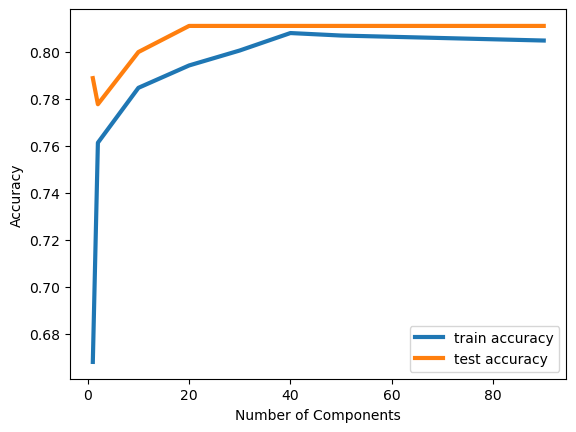

In [17]:
import matplotlib.pyplot as plt

plt.plot(no_comp, train_accuracy, label="train accuracy", linewidth=3)
plt.plot(no_comp, test_accuracy, label="test accuracy", linewidth=3)
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.legend()

In [21]:
np.shape(pca_train)

(943, 90)